In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Select the 'Close' column as the target variable
data=pd.read_csv('data/DJIA.csv')
data['Date'] = pd.to_datetime(data['Date'])
data_close = data['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
data_close_scaled = scaler.fit_transform(data_close.reshape(-1,1))

# Convert time series data into supervised learning problem
window_size = 60
X, Y = [], []
for i in range(window_size, len(data_close_scaled)):
    X.append(data_close_scaled[i-window_size:i, 0])
    Y.append(data_close_scaled[i, 0])
X, Y = np.array(X), np.array(Y)

# Reshape X to fit the model
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [4]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [5]:
# Define the early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history = model.fit(
    X_train, Y_train, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_test, Y_test), 
    callbacks=[early_stop], 
    shuffle=False
)

Epoch 1/50
165/165 [==============================] - 1s 7ms/step - loss: 2.3006e-05 - val_loss: 8.2924e-04
Epoch 2/50
165/165 [==============================] - 1s 7ms/step - loss: 2.4837e-05 - val_loss: 8.2851e-04
Epoch 3/50
165/165 [==============================] - 1s 7ms/step - loss: 2.4973e-05 - val_loss: 8.0295e-04
Epoch 4/50
165/165 [==============================] - 1s 6ms/step - loss: 2.4646e-05 - val_loss: 7.7648e-04
Epoch 5/50
165/165 [==============================] - 1s 7ms/step - loss: 2.4256e-05 - val_loss: 7.5230e-04
Epoch 6/50
165/165 [==============================] - 1s 7ms/step - loss: 2.3863e-05 - val_loss: 7.3049e-04
Epoch 7/50
165/165 [==============================] - 1s 7ms/step - loss: 2.3475e-05 - val_loss: 7.1077e-04
Epoch 8/50
165/165 [==============================] - 1s 7ms/step - loss: 2.3091e-05 - val_loss: 6.9290e-04
Epoch 9/50
165/165 [==============================] - 1s 7ms/step - loss: 2.2712e-05 - val_loss: 6.7678e-04
Epoch 10/50
165/165 [=======

In [7]:
# Predict the 'Close' prices
predictions = model.predict(X_test)

# Apply inverse transformation to get back original scale
predictions = scaler.inverse_transform(predictions)

42/42 [==============================] - 0s 2ms/step


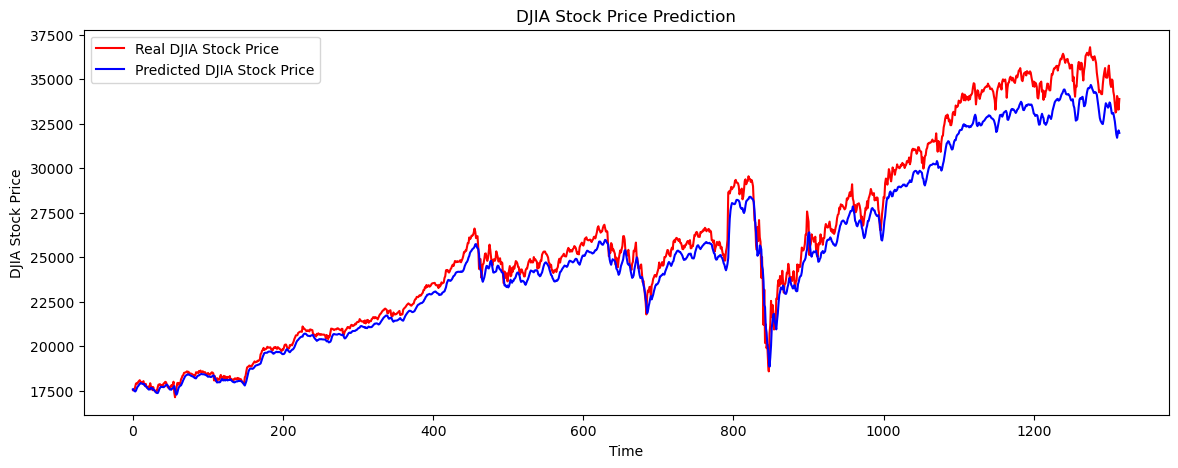

In [8]:
import matplotlib.pyplot as plt

# Get the original scale of test set 'Close' prices
Y_test_orig = scaler.inverse_transform(Y_test.reshape(-1,1))

# Plotting the results
plt.figure(figsize=(14,5))
plt.plot(Y_test_orig, color = 'red', label = 'Real DJIA Stock Price')
plt.plot(predictions, color = 'blue', label = 'Predicted DJIA Stock Price')
plt.title('DJIA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('DJIA Stock Price')
plt.legend()
plt.show()
